<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [420]:
# вынес сюда в начало функцию для бизнесовых метрик, чтобы сразу выполнять расчет по ходу обучения разных моделей
def business_metric(y_true, y_pred):    
    within_10_percent = np.abs((y_pred - y_true) / y_true) <= 0.1
    metric = np.mean(within_10_percent)
    return round(metric, 4)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Ответ: для воспроизводимости

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [509]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [422]:
display(df_train.sample(10))
display(df_train.head())
display(df_train.tail())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [423]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [424]:
pd.DataFrame(df_train.isna().mean()).rename(columns={0:'col'}).query("col > 0").T.columns

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [425]:
df_train.iloc[pd.DataFrame(df_train.duplicated(subset=list(df_train.columns))).rename(columns={0:'col'}).astype(float).query("col == 1").index.tolist()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [426]:
df_train['mileage'] = df_train['mileage'].str.replace(r"[^\d\.]", "", regex=True)
df_train['engine'] = df_train['engine'].str.replace(r"[^\d\.]", "", regex=True)
df_train['max_power'] = df_train['max_power'].str.replace(r"[^\d\.]", "", regex=True)

df_test['mileage'] = df_test['mileage'].str.replace(r"[^\d\.]", "", regex=True)
df_test['engine'] = df_test['engine'].str.replace(r"[^\d\.]", "", regex=True)
df_test['max_power'] = df_test['max_power'].str.replace(r"[^\d\.]", "", regex=True)

In [427]:
df_train['mileage'] = df_train['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce').astype(float)
df_train['seats'] = df_train['seats'].astype(float)

df_train['mileage'] = df_train['mileage'].fillna(df_train["mileage"].median())
df_train['engine'] = df_train['engine'].fillna(df_train["engine"].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train["max_power"].median())
df_train['seats'] = df_train['seats'].fillna(df_train["seats"].median())


df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce').astype(float)
df_test['seats'] = df_test['seats'].astype(float)

df_test['mileage'] = df_test['mileage'].fillna(df_train["mileage"].median())
df_test['engine'] = df_test['engine'].fillna(df_train["engine"].median())
df_test['max_power'] = df_test['max_power'].fillna(df_train["max_power"].median())
df_test['seats'] = df_test['seats'].fillna(df_train["seats"].median())

In [428]:
# в 3-м задании все равно требуется дропнуть torque. Его не обрабатываю. Колонка оч кривая. Ее надо 
# либо на 2 колонки распиливать, либо вообще просто сносить
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           203
seats              0
dtype: int64

In [510]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")


ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

Ответ: ребят, сорри, правда знаю как этим пользоваться, даже знаю по-круче инструменты для Авто-EDA.
Можно, конечно, создать отдельное виртуальное окружение, установить туда пониженную версию нампая. Надеюсь, что поймете и не буду снимать балл, т.к. задачу выполнил, просто нужно сделать даунгрейд на предыдущую версию библиотеки <3

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [429]:
df_train.iloc[pd.DataFrame(df_train.duplicated(subset=df_train.drop(columns=["selling_price"]).columns)).rename(columns={0:'col'}).astype(float).query("col == 1").index.tolist()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [430]:
df_train = df_train.drop_duplicates(
    subset=df_train.drop(columns=["selling_price"]).columns,
    keep='first'
)

In [431]:
df_test = df_test.drop_duplicates(
    subset=df_test.drop(columns=["selling_price"]).columns,
    keep='first'
)

In [432]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [433]:
# уже сделал выше очистку колонок от "мусора", тк без этой обработки было невозможно найти медианы

In [434]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [435]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [436]:
display(df_train.describe())
display(df_train.describe(include='object'))

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [437]:
display(df_test.describe())
display(df_test.describe(include='object'))

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,931.000000,9.310000e+02,931.000000,931.000000,931.000000,931.000000,931.000000
mean,2013.506982,5.501182e+05,72786.747583,19.377852,1435.484425,88.564694,5.409237
std,4.043408,5.987156e+05,48823.924040,3.994502,515.908793,32.715274,0.924622
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,4.000000
25%,2011.000000,2.500000e+05,39000.000000,16.500000,1196.500000,68.050000,5.000000
50%,2014.000000,4.200000e+05,65000.000000,19.330000,1248.000000,82.000000,5.000000
75%,2017.000000,6.500000e+05,100000.000000,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,9.000000


,name,fuel,seller_type,transmission,owner
count,931,931,931,931,931
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,14,498,813,839,562


In [438]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

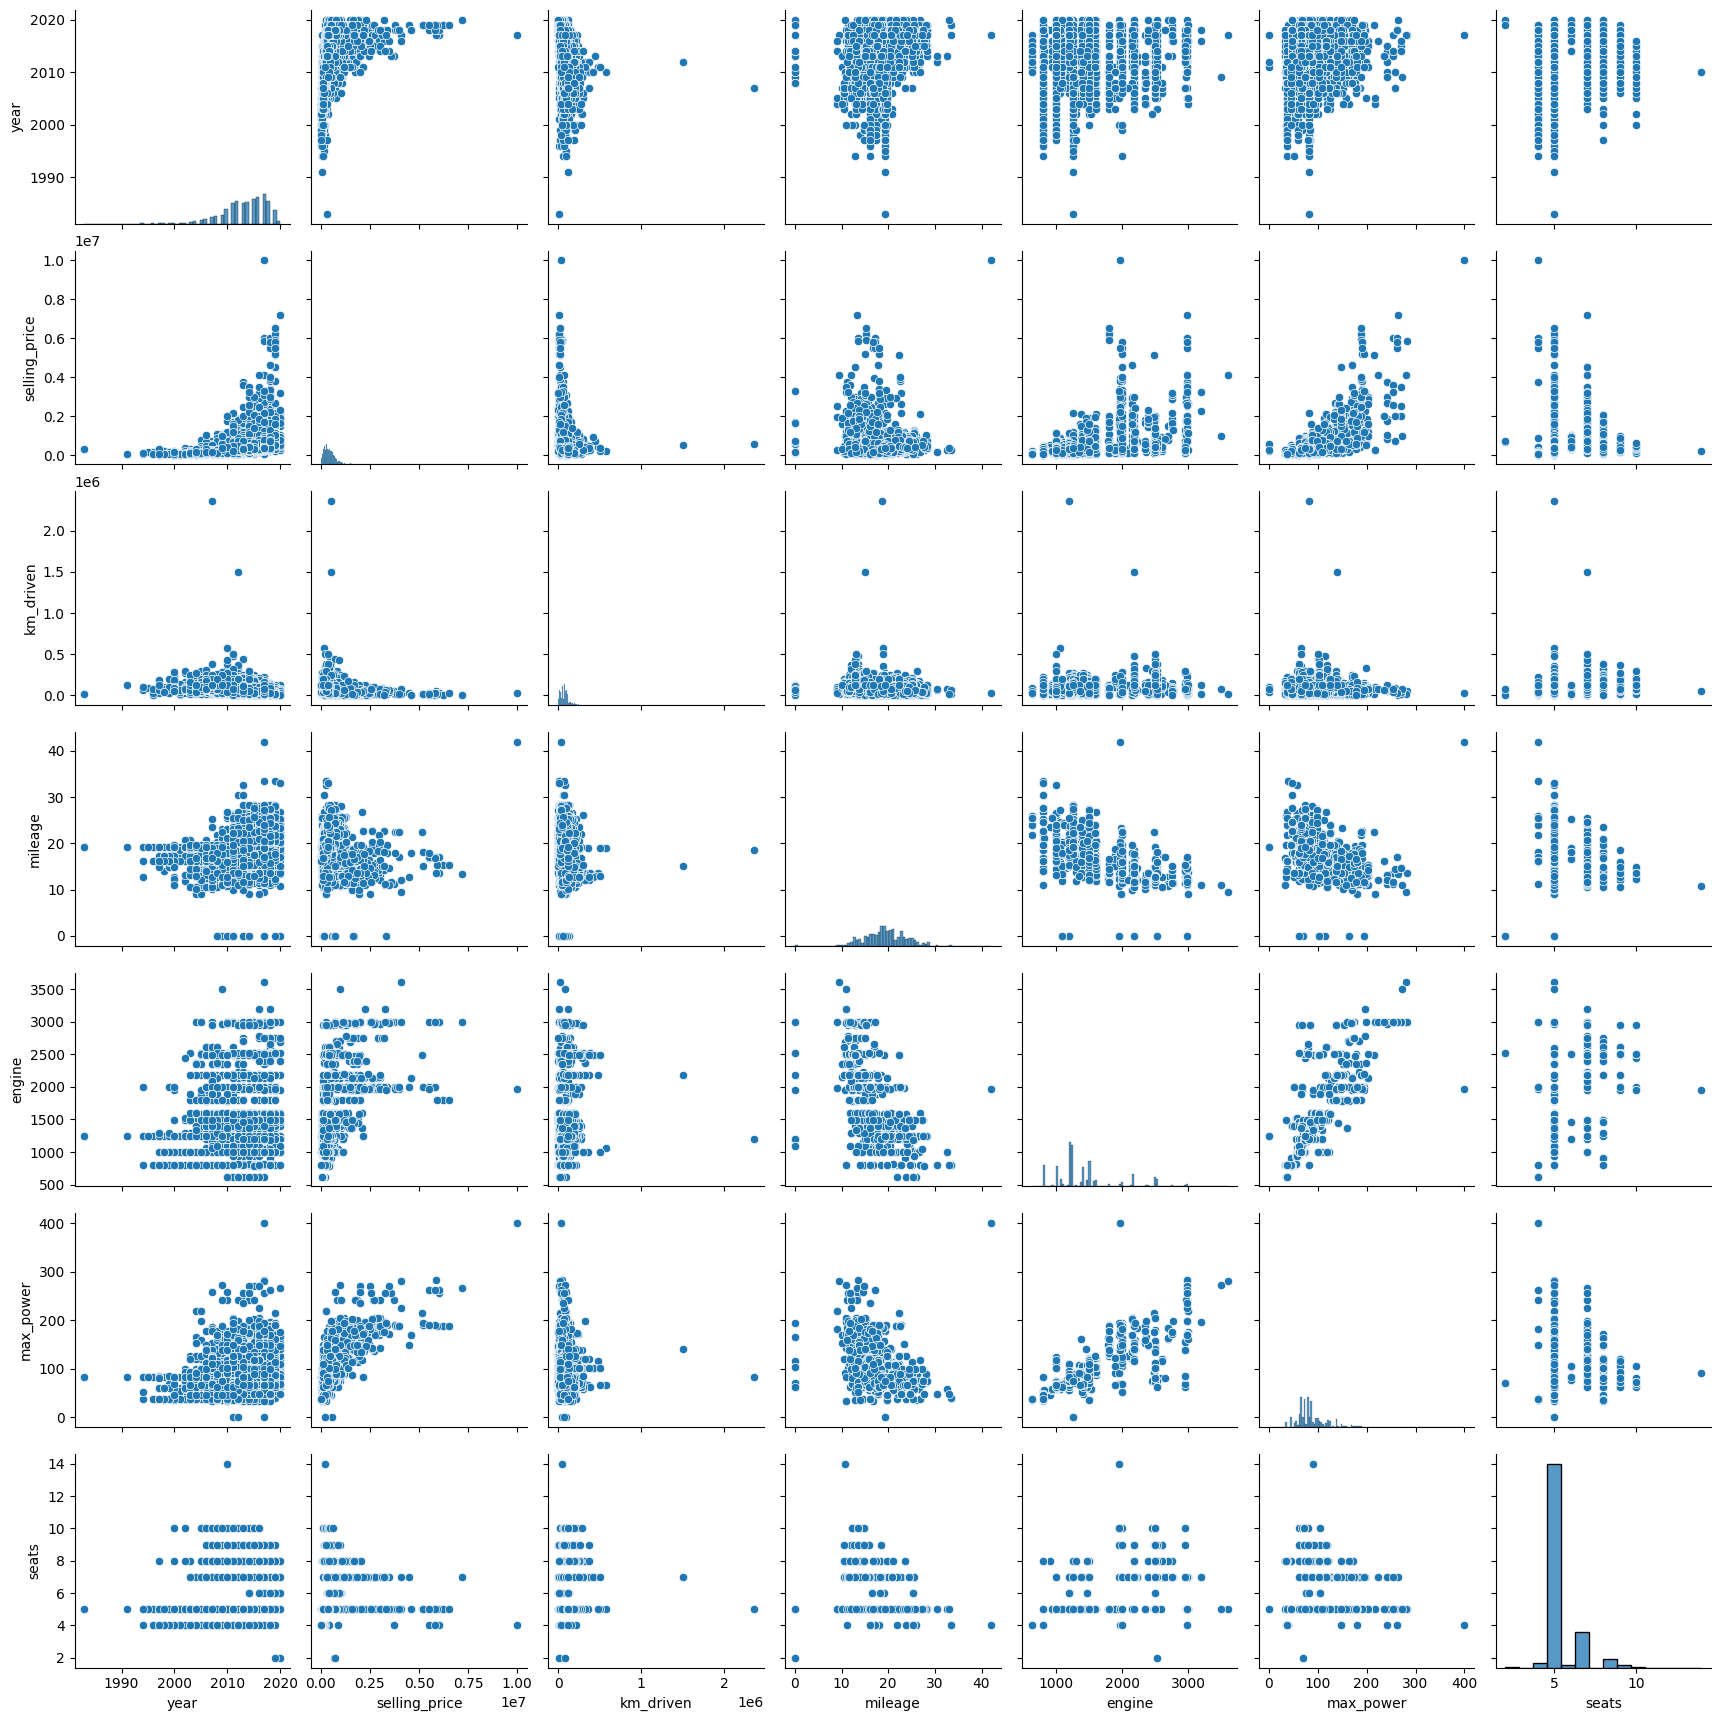

In [439]:
sns.pairplot(df_train.select_dtypes(['int64', 'float']))

# график не самый лучший, но визуально можно увидеть положительную корреляцию с годом, двигателем и мощностью

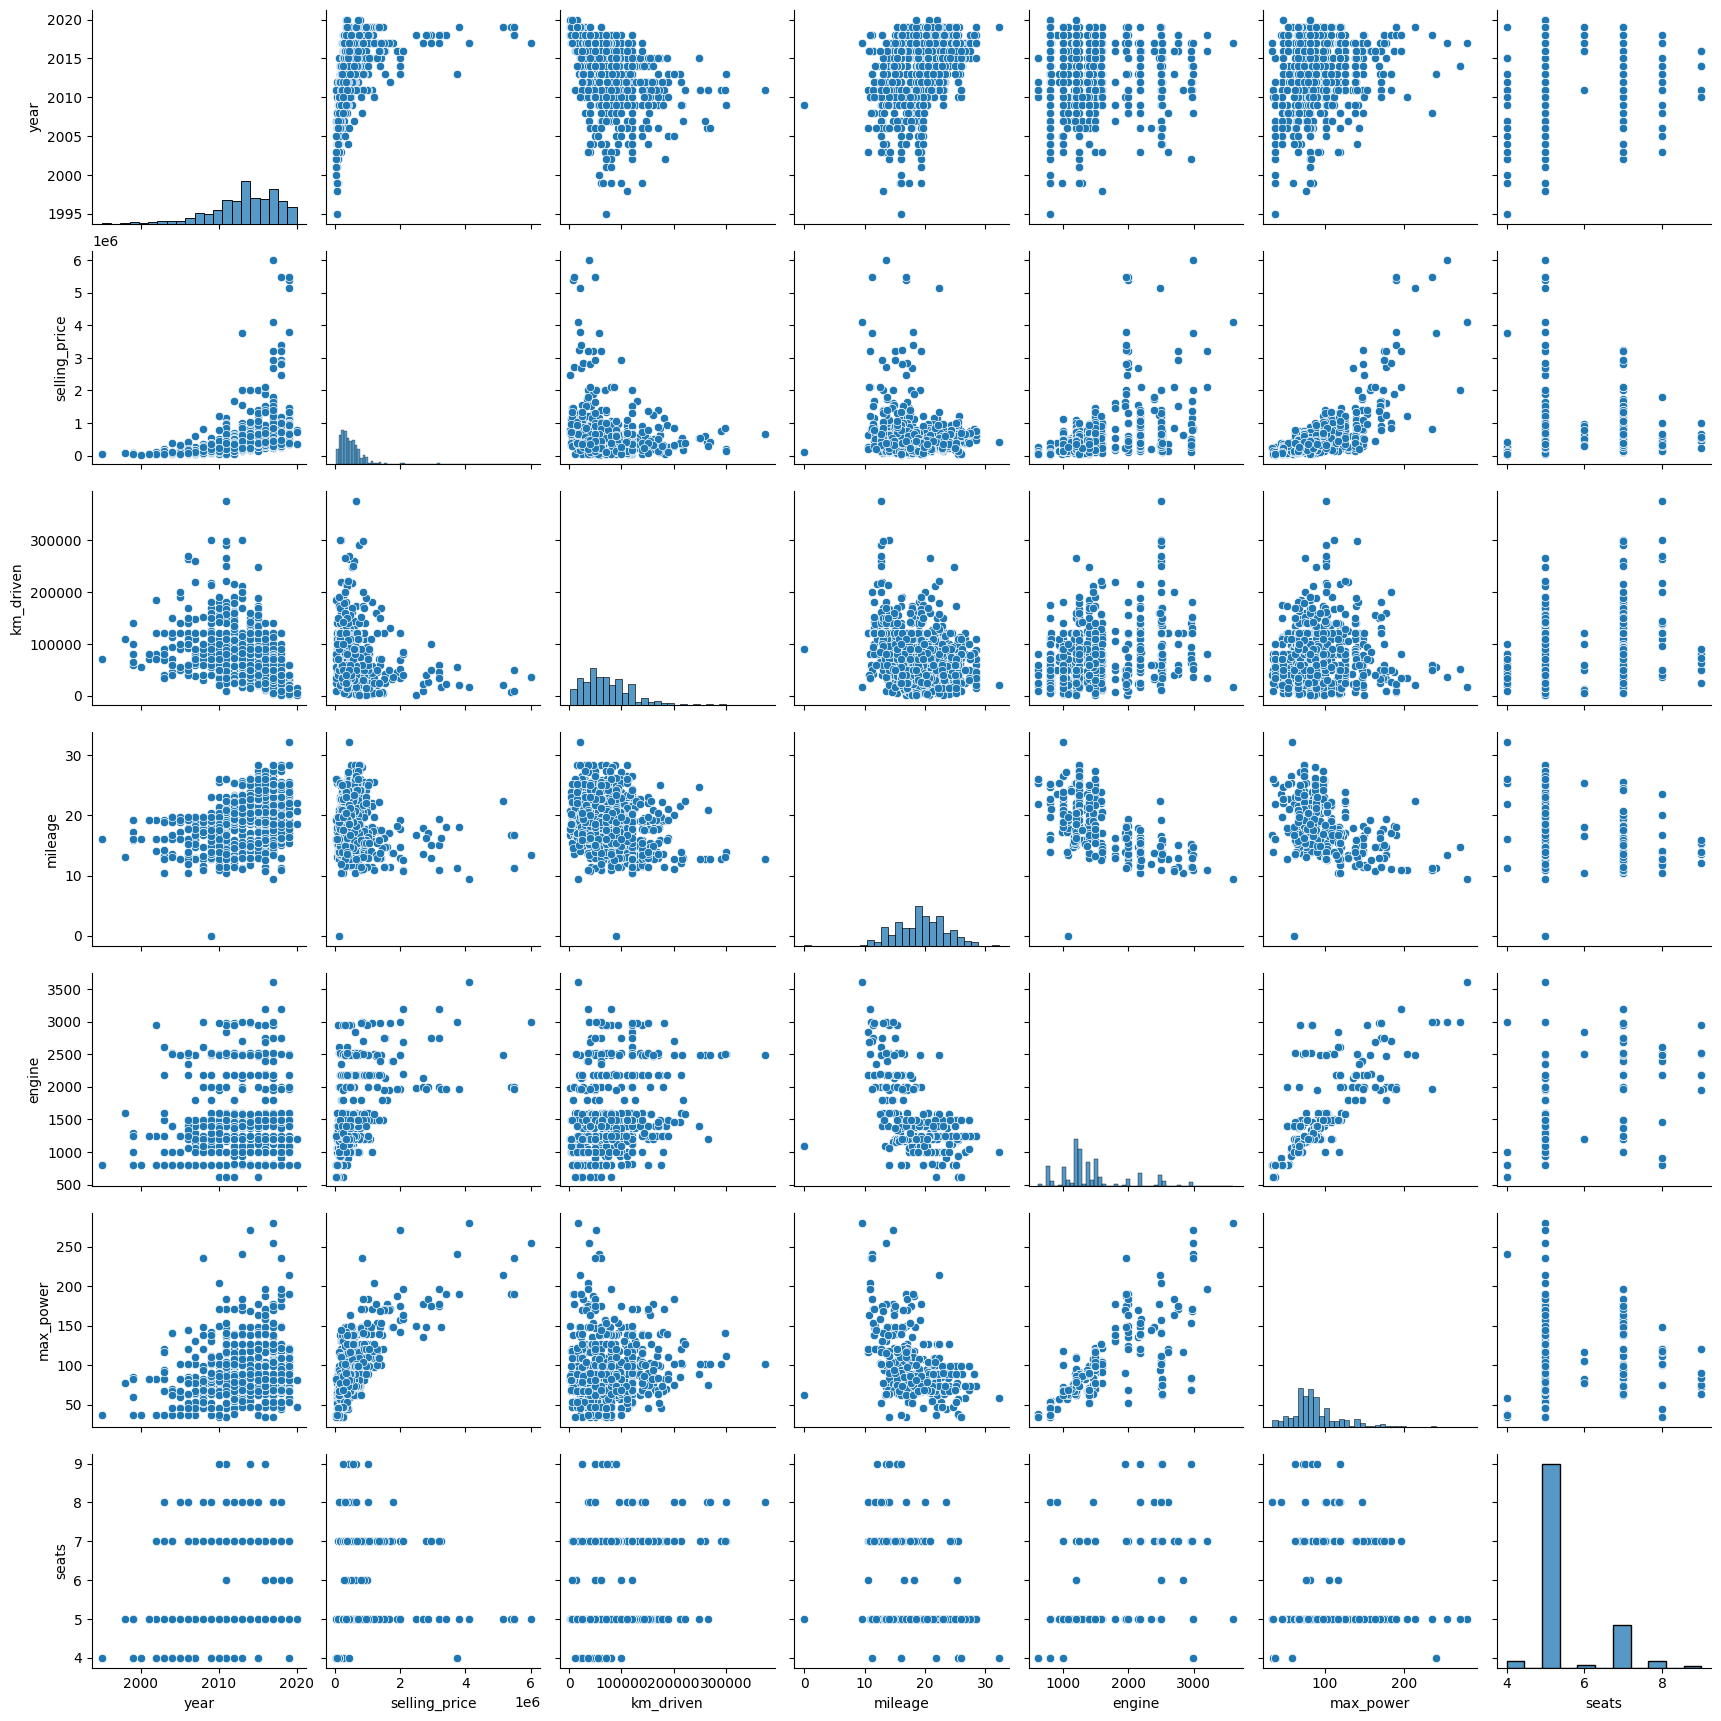

In [440]:
sns.pairplot(df_test.select_dtypes(['int64', 'float']))

# визуально распределения очень похожи. В целом это не проблема, если бы они были не похожи

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [441]:
corr = df_train.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


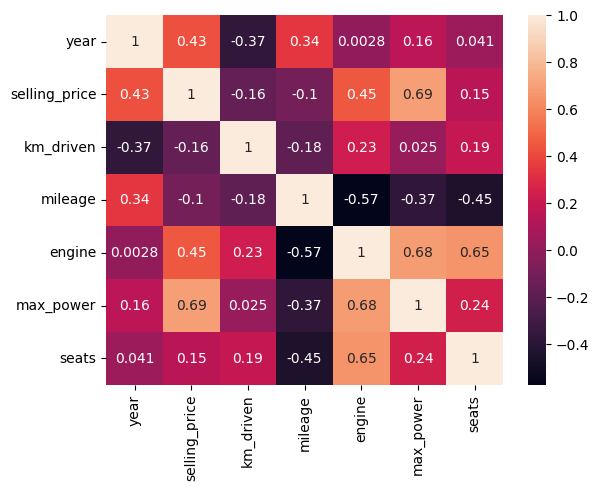

In [442]:
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True);


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Признаки ``engine`` & ``year`` наименее скоррелированы между собой со значением самым близким к нулю ``0.002819``
2) Самая сильная положительная линейная зависимость между признаками ``selling_price`` & ``max_power`` равная ``0.692814``
3) У признаков ``km_driven`` & ``year`` корреляция отрицательная, то есть при уменьшении года пробег будет больше. (машина 1980 года проехала больше км, чем машина 2000 года), ответ - ``да``

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [443]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [444]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name', 'selling_price',
                                 'fuel', 'seller_type',
                                 'transmission', 'owner'])

In [445]:
assert X_train.shape == (5840, 6)

In [446]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name', 'selling_price',
                                 'fuel', 'seller_type',
                                 'transmission', 'owner'])

In [447]:
X_test.shape

(931, 6)

In [448]:
assert X_test.shape == (931, 6) # в датафрейме были дубликаты. После их удаления остается 913 строка

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [449]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression().fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

mse_train = MSE(y_train, predict_train)
print('MSE train: ', mse_train)
mse_test = MSE(y_test, predict_test)
print('MSE test: ', mse_test)

MSE train:  116873067751.52162
MSE test:  137676071091.30634


In [450]:
r2_train = r2_score(y_train, predict_train)
print('R2 train: ', r2_train)
r2_test = r2_score(y_test, predict_test)
print('R2 test: ', r2_test)

R2 train:  0.5922629595849875
R2 test:  0.6155109420188011


In [452]:
business_metric(y_test, predict_test)

np.float64(0.2352)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [453]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [330]:
# после стандартизации
modelS = LinearRegression().fit(X_train, y_train)

predict_trainS = modelS.predict(X_train)
predict_testS = modelS.predict(X_test)

mse_trainS = MSE(y_train, predict_trainS)
print('MSE train: ', mse_trainS)
mse_testS = MSE(y_test, predict_testS)
print('MSE test: ', mse_testS)

r2_trainS = r2_score(y_train, predict_trainS)
print('R2 train: ', r2_trainS)
r2_testS = r2_score(y_test, predict_testS)
print('R2 test: ', r2_testS)

MSE train:  116873067751.52162
MSE test:  137676071091.30316
R2 train:  0.5922629595849875
R2 test:  0.6155109420188098


In [455]:
business_metric(y_test, predict_testS)

np.float64(0.2352)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [456]:
# your code here
features = X_train.columns
weights = model.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values(by='Weight')

,Feature,Weight
5,seats,-23639.946620
1,km_driven,-0.734992
3,engine,125.976483
2,mileage,7221.114448
4,max_power,10202.641566
0,year,37321.889568


Ответ: Год выпуска

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [457]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,0.139570,1.191152,0.996413,-0.373643,-0.439701,-0.434419
1,0.139570,0.766619,0.429384,0.141162,0.493387,-0.434419
2,-0.837167,0.883158,0.896054,-0.068879,0.066037,-0.434419
3,-1.569719,0.766619,-0.835142,-0.270682,0.009142,-0.434419
4,0.872122,-0.482007,0.178486,-0.478663,-0.191257,-0.434419
...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.378507,-0.707236,-0.815845,-0.434419
5836,-0.104614,-0.398765,-0.132627,-0.888447,-0.657801,-0.434419
5837,-0.104614,0.600136,-0.232987,-0.478663,-0.159965,-0.434419
5838,-1.569719,0.749971,-0.659513,0.130865,0.698211,-0.434419


In [458]:
from sklearn.linear_model import Lasso

ls_model = Lasso()
ls_model.fit(X_train, y_train)

pred_train = ls_model.predict(X_train)
pred_test = ls_model.predict(X_test)

mse_train = MSE(y_train, pred_train)
print('MSE train: ', mse_train)
mse_test = MSE(y_test, pred_test)
print('MSE test: ', mse_test)

r2_train = r2_score(y_train, pred_train)
print('R2 train: ', r2_train)
r2_test = r2_score(y_test, pred_test)
print('R2 test: ', r2_test)

MSE train:  116873067761.63501
MSE test:  137676232385.0699
R2 train:  0.5922629595497046
R2 test:  0.6155104915724257


In [459]:
features = X_train.columns
weights = ls_model.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values(by='Weight')

,Feature,Weight
1,km_driven,-44146.918538
5,seats,-23217.693273
2,mileage,28779.204085
3,engine,61172.025780
0,year,152843.083853
4,max_power,322780.586197


In [461]:
business_metric(y_test, pred_test)

np.float64(0.2352)

Ответ: скоррелированные признаки, слабая регуляризация, возможно, присутствует мультиколлинеарность признаков

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [462]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

model = Lasso()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [463]:
param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20],
    'max_iter': [100, 500, 1000],
    'tol': [0.0001, 0.001]
}

In [464]:
grid_ls = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='r2', verbose=True)
grid_ls.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20],
                         'max_iter': [100, 500, 1000], 'tol': [0.0001, 0.001]},
             scoring='r2', verbose=True)

In [465]:
grid_ls.best_estimator_.coef_

array([152838.66160917, -44125.79654277,  28744.64981868,  61080.6241692 ,
       322797.63242087, -23162.70163728])

In [466]:
print(grid_ls.best_score_)
print(grid_ls.best_params_)

0.5681692784929735
{'alpha': 20, 'max_iter': 100, 'tol': 0.0001}


In [467]:
pred_train = grid_ls.predict(X_train)
pred_test = grid_ls.predict(X_test)

mse_train = MSE(y_train, pred_train)
print('MSE train: ', mse_train)
mse_test = MSE(y_test, pred_test)
print('MSE test: ', mse_test)

r2_train = r2_score(y_train, pred_train)
print('R2 train: ', r2_train)
r2_test = r2_score(y_test, pred_test)
print('R2 test: ', r2_test)

MSE train:  116873071763.1054
MSE test:  137679320897.93997
R2 train:  0.5922629455897076
R2 test:  0.6155018662579859


In [469]:
business_metric(y_test, pred_test)

np.float64(0.2352)

Ответ:
- 60 моделей
- У лучшей модели регуляризация = 20, веса не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [470]:
from sklearn.linear_model import ElasticNet

In [471]:
model = ElasticNet()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [472]:
param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20],
    'l1_ratio': [0.01, 0.1, 1],
    'max_iter': [100, 500, 1000],
    'tol': [0.0001, 0.001]
}

In [473]:
grid_ls = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='r2', verbose=True)
grid_ls.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20],
                         'l1_ratio': [0.01, 0.1, 1],
                         'max_iter': [100, 500, 1000], 'tol': [0.0001, 0.001]},
             scoring='r2', verbose=True)

In [474]:
grid_ls.best_estimator_.coef_

array([140107.30469172, -46166.06327651,  18989.40768036,  83586.4043853 ,
       258955.53376787, -21830.62470766])

In [475]:
print(grid_ls.best_score_)
print(grid_ls.best_params_)

0.5764489566190454
{'alpha': 0.2, 'l1_ratio': 0.1, 'max_iter': 100, 'tol': 0.001}


In [476]:
pred_train = grid_ls.predict(X_train)
pred_test = grid_ls.predict(X_test)

mse_train = MSE(y_train, pred_train)
print('MSE train: ', mse_train)
mse_test = MSE(y_test, pred_test)
print('MSE test: ', mse_test)

r2_train = r2_score(y_train, pred_train)
print('R2 train: ', r2_train)
r2_test = r2_score(y_test, pred_test)
print('R2 test: ', r2_test)

MSE train:  119854230282.70728
MSE test:  145763236538.57935
R2 train:  0.5818625276390574
R2 test:  0.5929258507976989


In [477]:
business_metric(y_test, pred_test)

np.float64(0.246)

Ответ:
- 180 моделей
- У лучшей модели регуляризация = 0.2, веса не занулились

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [478]:
df_train['name'] = df_train['name'].apply(lambda x: x.split()[0]) # оставим наименования марок авто

In [479]:
df_test['name'] = df_test['name'].apply(lambda x: x.split()[0]) # оставим наименования марок авто

In [480]:
# X_train_cat = df_train.drop(columns=['name', 'selling_price'])
# X_test_cat = df_test.drop(columns=['name', 'selling_price'])

In [481]:
X_train_cat = df_train.drop(columns=['selling_price'])
X_test_cat = df_test.drop(columns=['selling_price'])

In [482]:
assert X_train_cat.shape == (5840, 11) # 11 тк не удалял "name"

In [483]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


In [484]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [485]:
cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
ohe_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore').fit(X_train_cat[cols])
X_train_cat_ohe = ohe_enc.transform(X_train_cat[cols])
X_train_cat_ohe = pd.DataFrame(data=X_train_cat_ohe, columns=ohe_enc.get_feature_names_out())

X_train_cat_ohe = pd.concat((X_train_cat.drop(columns=cols).reset_index(drop=True), X_train_cat_ohe.reset_index(drop=True)), axis=1)
X_train_cat_ohe.shape

(5840, 52)

In [486]:
X_test_cat_ohe = ohe_enc.transform(X_test_cat[cols])
X_test_cat_ohe = pd.DataFrame(data=X_test_cat_ohe, columns=ohe_enc.get_feature_names_out())

X_test_cat_ohe = pd.concat((X_test_cat.drop(columns=cols).reset_index(drop=True), X_test_cat_ohe.reset_index(drop=True)), axis=1)
X_test_cat_ohe.shape

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(931, 52)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [487]:
from sklearn.linear_model import Ridge

model = Ridge()

In [488]:
param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20],
    'max_iter': [100, 500, 1000],
    'tol': [0.0001, 0.001]
}

In [489]:
model = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='r2', verbose=True)
model.fit(X_train_cat_ohe, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20],
                         'max_iter': [100, 500, 1000], 'tol': [0.0001, 0.001]},
             scoring='r2', verbose=True)

In [490]:
model.best_estimator_.coef_

array([ 4.03179074e+04, -4.90599074e-01,  3.77630362e+03,  6.33009768e+01,
        6.38739268e+03,  3.97222451e+05,  9.71278283e+05, -5.22886658e+05,
        1.12037835e+04, -5.46646893e+05, -4.87980844e+05, -3.79013226e+05,
       -4.49897606e+05, -4.61334843e+05, -4.23084503e+05,  3.21303959e+04,
        6.32740738e+05,  1.07900247e+05, -5.51807601e+04,  8.73414672e+05,
        1.49899834e+06,  1.36005704e+05, -4.55982926e+05, -3.74579560e+05,
        5.89331597e+05, -1.49427803e+05, -4.49986052e+05, -5.44456206e+04,
       -4.67712486e+05, -4.55093001e+05, -5.49071497e+05, -1.89330295e+05,
       -4.94668423e+05,  1.63319569e+06,  1.15589998e+05,  1.63058168e+05,
        4.39305185e+04, -6.35392935e+04, -4.27957386e+04, -9.01159917e+04,
       -3.87435034e+04, -5.52740087e+04,  2.51907605e+06, -3.62324544e+04,
        3.52323784e+05, -8.69557470e+04, -1.38121053e+05, -9.78125931e+03,
       -7.44587417e+04, -1.43272407e+04,  4.01787781e+04, -6.07740317e+04])

In [491]:
print(model.best_score_)
print(model.best_params_)

0.7105143534863669
{'alpha': 1, 'max_iter': 100, 'tol': 0.0001}


In [492]:
pred_train = model.predict(X_train_cat_ohe)
pred_test = model.predict(X_test_cat_ohe)

mse_train = MSE(y_train, pred_train)
print('MSE train: ', mse_train)
mse_test = MSE(y_test, pred_test)
print('MSE test: ', mse_test)

r2_train = r2_score(y_train, pred_train)
print('R2 train: ', r2_train)
r2_test = r2_score(y_test, pred_test)
print('R2 test: ', r2_test)

MSE train:  65705108799.18444
MSE test:  83910668288.71059
R2 train:  0.7707734800041042
R2 test:  0.765662009751116


In [493]:
business_metric(y_test, pred_test)

np.float64(0.3115)

дополнительно проведу масштабирование признаков (как-никак с линейными моделями работаем жеж)

In [494]:
scaler = StandardScaler()

scaler.fit(X_train_cat_ohe)

X_train_cat_ohe_scaled = scaler.transform(X_train_cat_ohe)
X_test_cat_ohe_scaled = scaler.transform(X_test_cat_ohe)

In [495]:
model = Ridge()
model = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='r2', verbose=True)
model.fit(X_train_cat_ohe_scaled, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 20],
                         'max_iter': [100, 500, 1000], 'tol': [0.0001, 0.001]},
             scoring='r2', verbose=True)

In [496]:
model.best_estimator_.coef_

array([ 1.65303793e+05, -2.93741846e+04,  1.40789947e+04,  3.04237910e+04,
        1.94177005e+05,  2.68310718e+04,  8.55268379e+04, -9.57192755e+04,
       -1.49224763e+02, -5.27158378e+04, -4.20530166e+04, -1.28056174e+04,
       -1.03885676e+05, -1.05431018e+05, -1.67918495e+05,  1.23258828e+03,
        2.61824098e+04,  7.12863210e+03, -1.63179470e+03,  2.66840859e+04,
        3.97625781e+04,  4.55815498e+03, -1.45473286e+05, -1.80968320e+05,
        5.42167268e+04, -6.61823844e+03, -4.85278850e+04, -1.63026935e+03,
       -8.19904092e+04, -4.77638259e+04, -1.63187812e+05, -4.52193280e+04,
       -8.11440377e+04,  6.90895996e+04,  6.31893739e+04,  1.31428104e+04,
        2.57930457e+04, -1.73494791e+04, -2.00841607e+03, -2.14494041e+04,
       -6.04782257e+03, -2.49656187e+04,  8.37588373e+04, -1.00357125e+04,
        4.49189197e+04, -3.14901075e+04, -1.14636013e+04,  3.10849611e+03,
       -1.09192415e+04, -3.90216230e+02,  2.79931677e+03, -1.46565853e+03])

In [497]:
print(model.best_score_)
print(model.best_params_)

0.7072472660477123
{'alpha': 0.01, 'max_iter': 100, 'tol': 0.0001}


In [498]:
pred_train = model.predict(X_train_cat_ohe_scaled)
pred_test = model.predict(X_test_cat_ohe_scaled)

mse_train = MSE(y_train, pred_train)
print('MSE train: ', mse_train)
mse_test = MSE(y_test, pred_test)
print('MSE test: ', mse_test)

r2_train = r2_score(y_train, pred_train)
print('R2 train: ', r2_train)
r2_test = r2_score(y_test, pred_test)
print('R2 test: ', r2_test)

MSE train:  64849294395.35773
MSE test:  85137055858.41464
R2 train:  0.7737591741325643
R2 test:  0.7622370674379189


ничего не зимнеилось (почти) :)

In [499]:
business_metric(y_test, pred_test)

np.float64(0.3255)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [500]:
np.mean(np.abs((pred_test - y_test) / y_test) <= 0.1)

np.float64(0.32545649838882923)

In [501]:
def business_metric(y_true, y_pred):    
    within_10_percent = np.abs((y_pred - y_true) / y_true) <= 0.1
    metric = np.mean(within_10_percent)
    return round(metric, 4)

business_metric(y_test, pred_test)

np.float64(0.3255)

Ответ: Я везде выше по коду добавил расчет этой метрики. У последней моедли, очевидно, наилучший показатель.

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


In [503]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle

In [502]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [504]:
def clear_data(df):
    df['mileage'] = df['mileage'].str.replace(r"[^\d\.]", "", regex=True)
    df['engine'] = df['engine'].str.replace(r"[^\d\.]", "", regex=True)
    df['max_power'] = df['max_power'].str.replace(r"[^\d\.]", "", regex=True)

    df['mileage'] = df['mileage'].astype(float)
    df['engine'] = df['engine'].astype(float)

    df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce').astype(float)

    df.drop('torque', axis=1, inplace=True)

    for col in df.columns:
        if df[col].dtype == 'object':
            enc = LabelEncoder()
            df[col] = enc.fit_transform(df[col])

    df.dropna(inplace=True)

    y = df["selling_price"].values
    X = df.drop(columns=["name", "selling_price"])

    print(X.columns)

    X = X.values

    return X, y

X_train, y_train = clear_data(df_train)
X_test, y_test = clear_data(df_test)

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')
Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


In [505]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

with open("my_model.pkl", "wb") as f:
    pickle.dump(model, f)

print(mean_absolute_percentage_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8503787880268321
264436.4728384464
181533578822.4259


In [506]:
model.predict(X_test[0].reshape(1,-1))

array([587381.70459998])

In [507]:
X_test[0]

array([-1.03917939,  1.70578806, -0.88548156,  0.27531698,  0.38969784,
       -0.64858419, -1.34207791,  2.07450594,  0.57146324,  1.63828726])

In [6]:
import requests

js = {
    "year": -1.03917939,
    "km_driven": 1.70578806,
    "fuel": -0.88548156,
    "seller_type": 0.27531698,
    "transmission": 0.38969784,
    "owner": -0.64858419,
    "mileage": -1.34207791,
    "engine": 2.07450594,
    "max_power": 0.57146324,
    "seats": 1.63828726
}

r = requests.post(
    url="http://localhost:8000/predict_item",
    json=js
)

r.json()

{'your_price': 587381.7045713228}

## Предсказание цены для CSV-файла через FastAPI

In [ ]:
pd.DataFrame(X_test[:10]).to_csv("submission.csv", index=False)

In [8]:
!curl -X POST "http://127.0.0.1:8000/predict_items" -F "file=@submission.csv" -o returned_file.csv # в директории с проектом можете увидеть файл, который вернулся

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4337    0  2130  100  2207   534k   553k --:--:-- --:--:-- --:--:-- 1411k


In [5]:
!curl -X POST "http://127.0.0.1:8000/predict_items" -F "file=@submission.csv" -o returned_file.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4337    0  2130  100  2207   553k   573k --:--:-- --:--:-- --:--:-- 1411k


In [3]:
!curl -X POST "http://127.0.0.1:8000/predict_items" -F "file=@submission2.xlsx" # пример что не обрабатываются файлы с расширением .xlsx

{"status_code":500,"detail":"Ваш файл должен быть с расширением .csv","headers":{"info":null}}

In [ ]:
from fastapi import FastAPI, File, UploadFile, HTTPException, status
from pydantic import BaseModel
from fastapi.responses import StreamingResponse, JSONResponse
import pandas as pd
import numpy as np
import pickle
import uvicorn
import io

app = FastAPI()



class Item(BaseModel):
    year: float
    km_driven: float
    fuel: float
    seller_type: float
    transmission: float
    owner: float
    mileage: float
    engine: float
    max_power: float
    seats: float

@app.on_event("startup")
def load_model():
    with open("my_model.pkl", "rb") as f:
        global model
        model = pickle.load(f)


@app.post("/predict_item")
async def predict_item(item: Item) -> JSONResponse:
    values = [item.year, item.km_driven, item.fuel, item.seller_type, item.transmission, item.owner, item.mileage, item.engine, item.max_power, item.seats]
    values = np.array(values).reshape(1,-1)
    pred = model.predict(values)

    return JSONResponse(
        status_code=status.HTTP_200_OK,
        content={"your_price": pred[0]}
    )

@app.post("/predict_items")
async def predict_items(file: UploadFile = File(...)) -> StreamingResponse:
    print(f"Мы получили файл с названием: {file.filename}")
    if not file.filename.endswith("csv"):
        return HTTPException(
            status_code=status.HTTP_500_INTERNAL_SERVER_ERROR,
            detail="Ваш файл должен быть с расширением .csv",
            headers={"info":None}
        )
    else:
        df = pd.read_csv(file.file)

        pred = model.predict(df.values)
        df['pred'] = pred

        buffer = io.BytesIO()
        df.to_csv(buffer, index=False)
        buffer.seek(0)

        return StreamingResponse(
            buffer
        )



if __name__ == "__main__":
    uvicorn.run(
        "app:app",
        host="0.0.0.0",
        port=8000,
        reload=True
    )

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

Ответ: вместо скриншотов оставил вывод ячеек с овтетом из CLI
Примечение: в задании не было скзаано использовать конкретную модель, поэтому для упрощения я просто взял ванильную модель и обернул ее в API-сервис.

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Ответ: Сабрина